In [1]:
#import data
import pandas as pd
dailyActivity = pd.read_csv("C:/Users/kyles/Downloads/fitbit data/fitbit data/dailyActivity_merged.csv")
dailyActivity.head()


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Weight,HR
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,115.963146,0.0
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,115.963146,0.0
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,115.963146,0.0
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,115.963146,0.0
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,115.963146,0.0


In [2]:
#drop irrelevant columns
dailyActivity = dailyActivity.drop(columns=["ActivityDate","TotalDistance","LoggedActivitiesDistance", "Id"])

In [3]:
dailyActivity.head()

,TotalSteps,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Weight,HR
0,13162,8.50,1.88,0.55,6.06,0.0,25,13,328,728,1985,115.963146,0.0
1,10735,6.97,1.57,0.69,4.71,0.0,21,19,217,776,1797,115.963146,0.0
2,10460,6.74,2.44,0.40,3.91,0.0,30,11,181,1218,1776,115.963146,0.0
3,9762,6.28,2.14,1.26,2.83,0.0,29,34,209,726,1745,115.963146,0.0
4,12669,8.16,2.71,0.41,5.04,0.0,36,10,221,773,1863,115.963146,0.0


In [4]:
#import scaler and train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

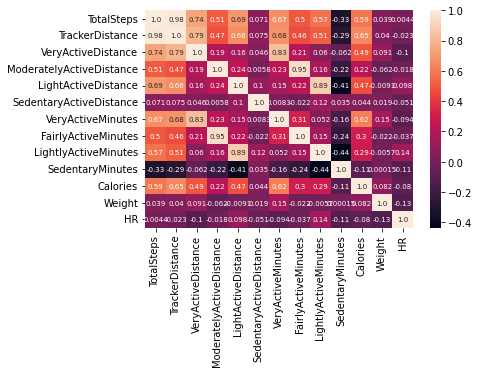

In [5]:
#examine correlation matrix
corr_matrix = dailyActivity.corr()
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(corr_matrix, annot=True, annot_kws={"size": 7}, fmt=".2")
plt.show()

In [6]:
#TrackerDistance and TotalSteps highly correlated (0.98), drop TrackerDistance.
dailyActivity = dailyActivity.drop(columns = ["TrackerDistance", "ModeratelyActiveDistance"])

In [7]:
#create X and y dataframes
X = dailyActivity.drop(columns = "Calories")
y = dailyActivity.Calories

In [8]:
X

,TotalSteps,VeryActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Weight,HR
0,13162,1.88,6.06,0.00,25,13,328,728,115.963146,0.0
1,10735,1.57,4.71,0.00,21,19,217,776,115.963146,0.0
2,10460,2.44,3.91,0.00,30,11,181,1218,115.963146,0.0
3,9762,2.14,2.83,0.00,29,34,209,726,115.963146,0.0
4,12669,2.71,5.04,0.00,36,10,221,773,115.963146,0.0
...,...,...,...,...,...,...,...,...,...,...
935,10686,1.08,6.80,0.00,17,4,245,1174,187.714432,0.0
936,20226,11.10,6.24,0.05,73,19,217,1131,187.714432,0.0
937,10733,1.35,6.28,0.00,18,11,224,1187,187.714432,0.0
938,21420,13.22,5.89,0.00,88,12,213,1127,187.714432,0.0


In [9]:
y

0      1985
1      1797
2      1776
3      1745
4      1863
       ... 
935    2847
936    3710
937    2832
938    3832
939    1849
Name: Calories, Length: 940, dtype: int64

In [10]:
#scale data
scaler = StandardScaler()
data = scaler.fit_transform(X, y)

In [11]:
#create new dataframe of scaled X values
df = pd.DataFrame(data)
X = df

In [12]:
#use train_test_split to create X and y splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [13]:
#import Linear Regression
from sklearn.linear_model import LinearRegression

In [14]:
#fit training data on regression model
regression = LinearRegression().fit(X_train, y_train)

In [15]:
#r^2 value
regression.score(X_test, y_test)

0.6445992956838549

In [16]:
#coefficients per variable
regression.coef_

array([-325.62459626,  102.63309981,  645.81959079,    6.07907743,
        456.15953195,  131.49087337, -174.11753953,  126.16185717,
          3.87962179,  -22.45374671])

In [17]:
#2289.93 calories as baseline
regression.intercept_

2302.7194688932223

In [18]:
#predict calories on test data, name y_pred
y_pred = regression.predict(X_test)

In [19]:
#import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [20]:
min_cal = y_test.min()
max_cal = y_test.max()
cal_diff = max_cal - min_cal
cal_diff

3898

In [21]:
#r^2
r2_linear = r2_score(y_test, y_pred)
r2_linear

0.6445992956838549

In [22]:
#MSE
mse_linear = mean_squared_error(y_test, y_pred)
mse_linear

155481.69947754304

In [23]:
#RMSE
rmse_linear = mean_squared_error(y_test, y_pred, squared=False)
rmse_linear

394.3116780892281

In [24]:
#NRMSE
rmse_linear/cal_diff

0.10115743409164395

In [25]:
#import random forest
from sklearn.ensemble import RandomForestRegressor

In [26]:
rf_regr = RandomForestRegressor()
rf_regr.fit(X_train, y_train)
y_pred_rf = rf_regr.predict(X_test)

In [27]:
#r^2
r2_rf= r2_score(y_test, y_pred_rf)
r2_rf

0.7349917006353022

In [28]:
#MSE
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_rf

115936.57598445256

In [29]:
#RMSE
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
rmse_rf

340.49460492708624

In [30]:
#NRMSE
nrmse_rf = rmse_rf/cal_diff
nrmse_rf

0.08735110439381381

In [31]:
dailyActivity.describe()


,TotalSteps,VeryActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Weight,HR
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,7637.910638,1.502681,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,45.045750,16.866618
std,5087.150742,2.658941,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,80.377499,32.391691
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3789.750000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,0.000000,0.000000
50%,7405.500000,0.210000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,0.000000,0.000000
75%,10727.000000,2.052500,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,115.963146,0.000000
max,36019.000000,21.920000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,294.317120,93.776305


In [32]:
dailyActivity.shape

(940, 11)

Text(0.5, 1.0, 'Daily Steps Walked vs. Calories Burned that Day')

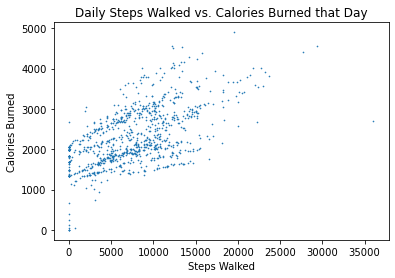

In [33]:
import matplotlib.pyplot as plt
plt.scatter(dailyActivity['TotalSteps'], dailyActivity['Calories'], s=0.4)
plt.xlabel('Steps Walked')
plt.ylabel('Calories Burned')
plt.title('Daily Steps Walked vs. Calories Burned that Day')

In [34]:
sleep = pd.read_csv("C:/Users/kyles/Downloads/fitbit data/fitbit data/sleepDay_merged.csv")
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [35]:
sleep.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [36]:
sleep.Id.unique()

array([1503960366, 1644430081, 1844505072, 1927972279, 2026352035,
       2320127002, 2347167796, 3977333714, 4020332650, 4319703577,
       4388161847, 4445114986, 4558609924, 4702921684, 5553957443,
       5577150313, 6117666160, 6775888955, 6962181067, 7007744171,
       7086361926, 8053475328, 8378563200, 8792009665], dtype=int64)

In [37]:
import pandas as pd
dailyCalories = pd.read_csv("C:/Users/kyles/Downloads/fitbit data/fitbit data/dailyCalories_merged.csv")
dailyIntensities = pd.read_csv("C:/Users/kyles/Downloads/fitbit data/fitbit data/dailyIntensities_merged.csv")
dailySteps = pd.read_csv("C:/Users/kyles/Downloads/fitbit data/fitbit data/dailySteps_merged.csv")
heartRate = pd.read_csv("C:/Users/kyles/Downloads/fitbit data/fitbit data/heartrate_seconds_merged.csv")
hourlyCalories = pd.read_csv("C:/Users/kyles/Downloads/fitbit data/fitbit data/hourlyCalories_merged.csv")
hourlyIntensities = pd.read_csv("C:/Users/kyles/Downloads/fitbit data/fitbit data/hourlyIntensities_merged.csv")
hourlySteps = pd.read_csv("C:/Users/kyles/Downloads/fitbit data/fitbit data/hourlySteps_merged.csv")
minuteCaloriesNarrow = pd.read_csv("C:/Users/kyles/Downloads/fitbit data/fitbit data/minuteCaloriesNarrow_merged.csv")
minuteCaloriesWide = pd.read_csv("C:/Users/kyles/Downloads/fitbit data/fitbit data/minuteCaloriesWide_merged.csv")
minuteIntensitiesNarrow = pd.read_csv("C:/Users/kyles/Downloads/fitbit data/fitbit data/minuteIntensitiesNarrow_merged.csv")
minuteIntensitiesWide = pd.read_csv("C:/Users/kyles/Downloads/fitbit data/fitbit data/minuteIntensitiesWide_merged.csv")
minuteMETs = pd.read_csv("C:/Users/kyles/Downloads/fitbit data/fitbit data/minuteMETsNarrow_merged.csv")
minuteSleep = pd.read_csv("C:/Users/kyles/Downloads/fitbit data/fitbit data/minuteSleep_merged.csv")
minuteStepsNarrow = pd.read_csv("C:/Users/kyles/Downloads/fitbit data/fitbit data/minuteStepsNarrow_merged.csv")
minuteStepsWide = pd.read_csv("C:/Users/kyles/Downloads/fitbit data/fitbit data/minuteStepsWide_merged.csv")
weight = pd.read_csv("C:/Users/kyles/Downloads/fitbit data/fitbit data/weightLogInfo_merged.csv")

In [38]:
dailyCalories.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [39]:
dailyIntensities.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71


In [40]:
dailySteps.head()

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


In [41]:
heartRate[heartRate['Id'] == 2022484408]

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101
...,...,...,...
154099,2022484408,5/12/2016 3:47:25 PM,71
154100,2022484408,5/12/2016 3:47:30 PM,71
154101,2022484408,5/12/2016 3:47:45 PM,71
154102,2022484408,5/12/2016 3:47:50 PM,70


In [42]:
heartRate.Id.unique()

array([2022484408, 2026352035, 2347167796, 4020332650, 4388161847,
       4558609924, 5553957443, 5577150313, 6117666160, 6775888955,
       6962181067, 7007744171, 8792009665, 8877689391], dtype=int64)

In [43]:
heartRate.shape

(2483658, 3)

In [44]:
hourlyCalories.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [45]:
hourlyIntensities.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


In [46]:
hourlySteps.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [47]:
minuteCaloriesNarrow.head()

,Id,ActivityMinute,Calories
0,1503960366,4/12/2016 12:00:00 AM,0.7865
1,1503960366,4/12/2016 12:01:00 AM,0.7865
2,1503960366,4/12/2016 12:02:00 AM,0.7865
3,1503960366,4/12/2016 12:03:00 AM,0.7865
4,1503960366,4/12/2016 12:04:00 AM,0.7865


In [48]:
minuteCaloriesWide.head()

,Id,ActivityHour,Calories00,Calories01,Calories02,Calories03,Calories04,Calories05,Calories06,Calories07,...,Calories50,Calories51,Calories52,Calories53,Calories54,Calories55,Calories56,Calories57,Calories58,Calories59
0,1503960366,4/13/2016 12:00:00 AM,1.8876,2.2022,0.9438,0.9438,0.9438,2.0449,0.9438,2.2022,...,0.9438,2.0449,2.0449,0.9438,2.3595,1.8876,0.9438,0.9438,0.9438,0.9438
1,1503960366,4/13/2016 1:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.9438,0.9438,0.9438,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
2,1503960366,4/13/2016 2:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
3,1503960366,4/13/2016 3:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
4,1503960366,4/13/2016 4:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865


In [49]:
minuteIntensitiesNarrow.head()

,Id,ActivityMinute,Intensity
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0
2,1503960366,4/12/2016 12:02:00 AM,0
3,1503960366,4/12/2016 12:03:00 AM,0
4,1503960366,4/12/2016 12:04:00 AM,0


In [50]:
minuteIntensitiesWide.head()

,Id,ActivityHour,Intensity00,Intensity01,Intensity02,Intensity03,Intensity04,Intensity05,Intensity06,Intensity07,...,Intensity50,Intensity51,Intensity52,Intensity53,Intensity54,Intensity55,Intensity56,Intensity57,Intensity58,Intensity59
0,1503960366,4/13/2016 12:00:00 AM,1,1,0,0,0,1,0,1,...,0,1,1,0,1,1,0,0,0,0
1,1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
minuteMETs

,Id,ActivityMinute,METs
0,1503960366,4/12/2016 12:00:00 AM,10
1,1503960366,4/12/2016 12:01:00 AM,10
2,1503960366,4/12/2016 12:02:00 AM,10
3,1503960366,4/12/2016 12:03:00 AM,10
4,1503960366,4/12/2016 12:04:00 AM,10
...,...,...,...
1325575,8877689391,5/12/2016 1:55:00 PM,11
1325576,8877689391,5/12/2016 1:56:00 PM,11
1325577,8877689391,5/12/2016 1:57:00 PM,11
1325578,8877689391,5/12/2016 1:58:00 PM,11


In [52]:
minuteSleep

,Id,date,value,logId
0,1503960366,4/12/2016 2:47:30 AM,3,11380564589
1,1503960366,4/12/2016 2:48:30 AM,2,11380564589
2,1503960366,4/12/2016 2:49:30 AM,1,11380564589
3,1503960366,4/12/2016 2:50:30 AM,1,11380564589
4,1503960366,4/12/2016 2:51:30 AM,1,11380564589
...,...,...,...,...
188516,8792009665,5/4/2016 9:59:00 AM,1,11552534115
188517,8792009665,5/4/2016 10:00:00 AM,1,11552534115
188518,8792009665,5/4/2016 10:01:00 AM,1,11552534115
188519,8792009665,5/4/2016 10:02:00 AM,1,11552534115


In [53]:
minuteStepsNarrow

,Id,ActivityMinute,Steps
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0
2,1503960366,4/12/2016 12:02:00 AM,0
3,1503960366,4/12/2016 12:03:00 AM,0
4,1503960366,4/12/2016 12:04:00 AM,0
...,...,...,...
1325575,8877689391,5/12/2016 1:55:00 PM,0
1325576,8877689391,5/12/2016 1:56:00 PM,0
1325577,8877689391,5/12/2016 1:57:00 PM,0
1325578,8877689391,5/12/2016 1:58:00 PM,0


In [54]:
minuteStepsWide

,Id,ActivityHour,Steps00,Steps01,Steps02,Steps03,Steps04,Steps05,Steps06,Steps07,...,Steps50,Steps51,Steps52,Steps53,Steps54,Steps55,Steps56,Steps57,Steps58,Steps59
0,1503960366,4/13/2016 12:00:00 AM,4,16,0,0,0,9,0,17,...,0,9,8,0,20,1,0,0,0,0
1,1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21640,8877689391,5/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21641,8877689391,5/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21642,8877689391,5/13/2016 5:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21643,8877689391,5/13/2016 6:00:00 AM,0,0,0,0,0,0,0,0,...,21,22,33,17,24,0,0,20,38,16


In [55]:
weight

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000
...,...,...,...,...,...,...,...,...
62,8877689391,5/6/2016 6:43:35 AM,85.000000,187.392923,NaN,25.440001,False,1462517015000
63,8877689391,5/8/2016 7:35:53 AM,85.400002,188.274775,NaN,25.559999,False,1462692953000
64,8877689391,5/9/2016 6:39:44 AM,85.500000,188.495234,NaN,25.610001,False,1462775984000
65,8877689391,5/11/2016 6:51:47 AM,85.400002,188.274775,NaN,25.559999,False,1462949507000


In [56]:
weight.Id.unique()

array([1503960366, 1927972279, 2873212765, 4319703577, 4558609924,
       5577150313, 6962181067, 8877689391], dtype=int64)